In [320]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set1', style='darkgrid')
%matplotlib inline

In [321]:
df_01 = pd.read_csv("data/Dataset-1.csv")

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [322]:
df_01.columns

Index(['Unnamed: 0', 'Id', 'Idade', 'EstadoCivil', 'BillingCity',
       'NivelConhecimentoAtual', 'ScoreNivelConhecimento', 'PerfilInvestidor',
       'RendaMensal', 'ValorPatrimonio', 'Pergunta1', 'Resposta11',
       'Pergunta2', 'Resposta21', 'Pergunta3', 'Resposta31', 'Pergunta4',
       'Resposta41', 'Pergunta5', 'Resposta51', 'Resposta52', 'Resposta53',
       'Resposta54', 'Resposta55', 'Resposta56', 'Resposta57', 'Resposta58',
       'Pergunta6', 'Resposta61', 'Resposta62', 'Resposta63', 'Resposta64',
       'Resposta65', 'Resposta66', 'Resposta67', 'Resposta68', 'Pergunta7',
       'Resposta71', 'Resposta72', 'Resposta73', 'Resposta74', 'Resposta75',
       'Pergunta8', 'Resposta81', 'Pergunta9', 'Resposta91', 'ScoreRisco',
       'ScoreObjetivos', 'ScoreSituacaoFinanceira', 'Produto', 'NomeDoProduto',
       'NomeEmissor', 'TaxaCliente', 'TaxaPreCliente', 'DescricaoProduto',
       'ValorMinimoAplicaInicial', 'ValorMinimoAplicacaoAdicional',
       'DataVencimento', 'Familia

In [323]:
del df_01['Unnamed: 0']

In [324]:
df_01.shape

(38102, 65)

In [325]:
client_cols = ['Id', 'Idade', 'EstadoCivil', 'BillingCity', 'ScoreNivelConhecimento', 'PerfilInvestidor',
              'RendaMensal', 'ValorPatrimonio', 'ScoreObjetivos', 'ScoreSituacaoFinanceira', 'ScoreRisco']

In [326]:
respostas_cols = ['Id', 'Resposta11', 'Resposta31', 'Resposta81']

# ------------------------------------------------------

# Data Wrangling de Clientes

# ------------------------------------------------------

### cria df com clientes únicos

In [327]:
df_client = df_01[client_cols]

In [328]:
df_client.drop_duplicates(inplace=True, subset=['Id'])

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [329]:
print(f"Clientes únicos: {df_client.shape[0]}\n\n")
print(f"coluna Id:\n{df_client['Id'].describe()}\n\n")
print(f"distribuição de perfil de investidor:\n{df_client['PerfilInvestidor'].value_counts()}")

Clientes únicos: 13409


coluna Id:
count                                                 13409
unique                                                13409
top       $2b$10$.DCvvJ9WSDpqVP2xXjeSPefWRIha9MJAcVU9Icb...
freq                                                      1
Name: Id, dtype: object


distribuição de perfil de investidor:
2    5541
3    3270
4    2043
1    1345
5     689
0     521
Name: PerfilInvestidor, dtype: int64


In [330]:
df_client.head()

,Id,Idade,EstadoCivil,BillingCity,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,ScoreObjetivos,ScoreSituacaoFinanceira,ScoreRisco
0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,30,M,Aracruz,1.0,2,1300.0,6000.0,2.0,1.0,2.0
1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,2,500.0,NaN,3.0,1.0,3.0
27,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeS5Fvu8ovGET5gJm4i...,32,C,Valparaíso de Goiás,1.0,1,3100.0,250000.0,1.0,1.0,2.0
31,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeSjLIwE1Kdi6le.fXF...,47,S,São Paulo,1.0,3,2000.0,NaN,5.0,2.0,4.0
33,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeOdVxMPQWM4mWXxiPz...,46,D,Olinda,2.0,2,6000.0,500000.0,2.0,2.0,2.0


### Transforma Perfil investidor em 'conservador', 'moderado' e 'arrojado' 

In [331]:
df_client.loc[:,'P_investidor'] = df_client['PerfilInvestidor'].apply(lambda x: 'conservador' if x == 1 or x == 2 
                                                               else 'moderado' if x == 3 or x== 4 else 'arrojado' )

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Número de clientes com o Valor do patrimônio nulo 

In [332]:
df_client['ValorPatrimonio'].isnull().sum()

4980

In [333]:
df_client['b_renda_mensal'] = pd.qcut(df_client['RendaMensal'],q= 5, labels=['baixa', 'baixa_media', 'media', 'media_alta', 'alta'])

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [334]:
df_client['b_idade'] = pd.qcut(df_client['Idade'],q= 3, labels = ['16_30', '30_40', '40_90'])

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [335]:
df_client['b_renda_mensal'] = df_client.apply(lambda x: 'alta' if x['RendaMensal'] >= 10081.00 and x['RendaMensal'] < 30000.00 else 
                                              'muito_alta' if x['RendaMensal'] >= 30000.00 else x['b_renda_mensal'], axis=1)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [336]:
print(f"Mínimo renda baixa: {df_client[df_client['b_renda_mensal'] == 'baixa']['RendaMensal'].min()}, máximo: {df_client[df_client['b_renda_mensal'] == 'baixa']['RendaMensal'].max()}")
print(f"Mínimo renda baixa_media: {df_client[df_client['b_renda_mensal'] == 'baixa_media']['RendaMensal'].min()}, máximo: {df_client[df_client['b_renda_mensal'] == 'baixa_media']['RendaMensal'].max()}")
print(f"Mínimo renda media: {df_client[df_client['b_renda_mensal'] == 'media']['RendaMensal'].min()}, máximo: {df_client[df_client['b_renda_mensal'] == 'media']['RendaMensal'].max()}")
print(f"Mínimo renda media_alta: {df_client[df_client['b_renda_mensal'] == 'media_alta']['RendaMensal'].min()}, máximo: {df_client[df_client['b_renda_mensal'] == 'media_alta']['RendaMensal'].max()}")
print(f"Mínimo renda alta: {df_client[df_client['b_renda_mensal'] == 'alta']['RendaMensal'].min()}, máximo: {df_client[df_client['b_renda_mensal'] == 'alta']['RendaMensal'].max()}")
print(f"Mínimo renda muito_alta: {df_client[df_client['b_renda_mensal'] == 'muito_alta']['RendaMensal'].min()}, máximo: {df_client[df_client['b_renda_mensal'] == 'muito_alta']['RendaMensal'].max()}")

Mínimo renda baixa: 0.0, máximo: 1500.0
Mínimo renda baixa_media: 1502.0, máximo: 2500.0
Mínimo renda media: 2508.0, máximo: 4600.0
Mínimo renda media_alta: 4611.0, máximo: 10000.0
Mínimo renda alta: 10081.0, máximo: 29500.0
Mínimo renda muito_alta: 30000.0, máximo: 2400000.0


## Exploração dos dados

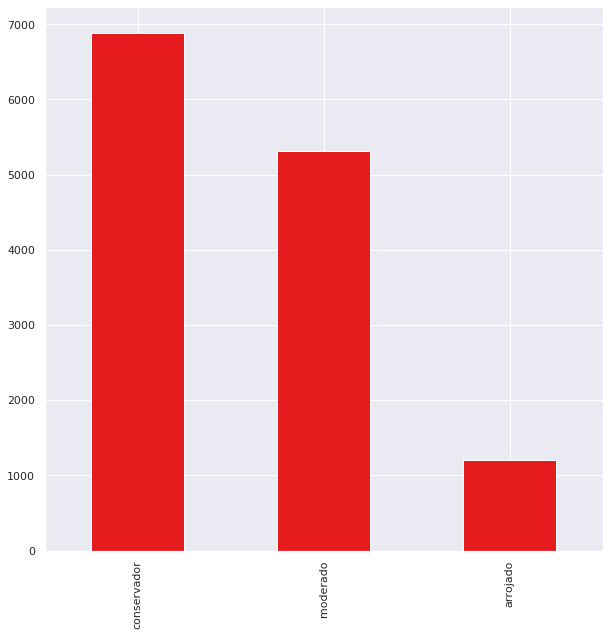

In [337]:
plt.figure(figsize=(10,10))
df_client['P_investidor'].value_counts().plot(kind='bar')

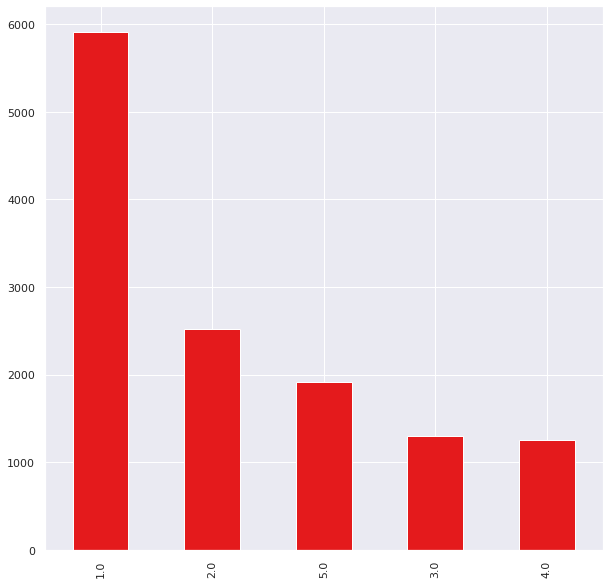

In [338]:
plt.figure(figsize=(10,10))
df_client['ScoreNivelConhecimento'].value_counts().plot(kind='bar')

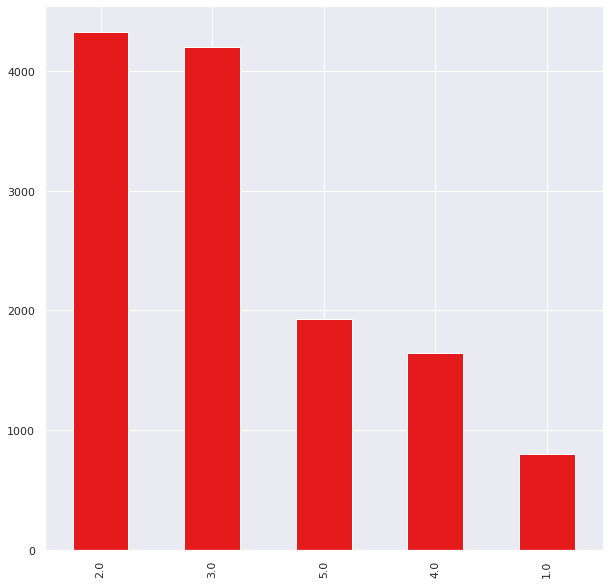

In [339]:
plt.figure(figsize=(10,10))
df_client['ScoreObjetivos'].value_counts().plot(kind='bar')

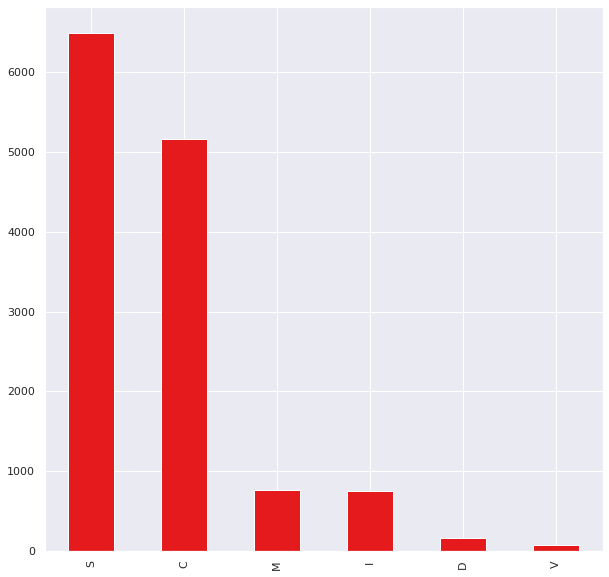

In [340]:
plt.figure(figsize=(10,10))
df_client['EstadoCivil'].value_counts().plot(kind='bar')

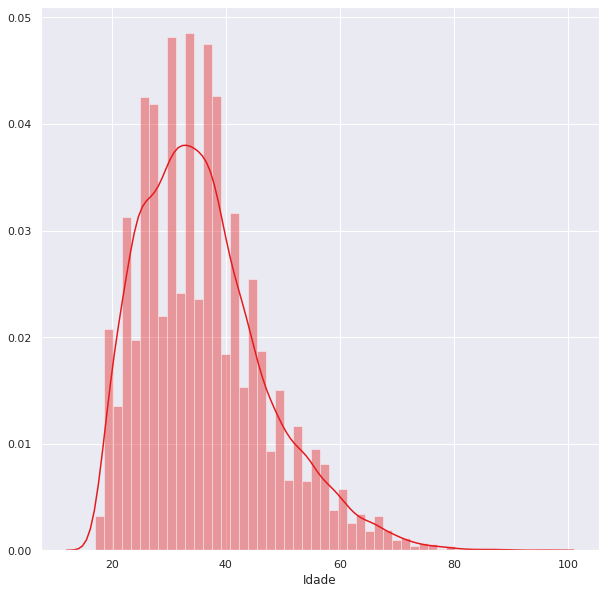

In [341]:
plt.figure(figsize=(10,10))
sns.distplot(df_client['Idade'])

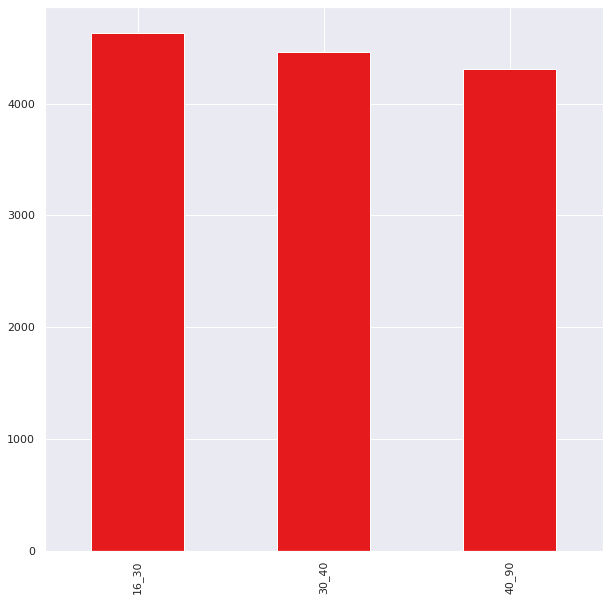

In [342]:
plt.figure(figsize=(10,10))
df_client['b_idade'].value_counts().plot(kind='bar')

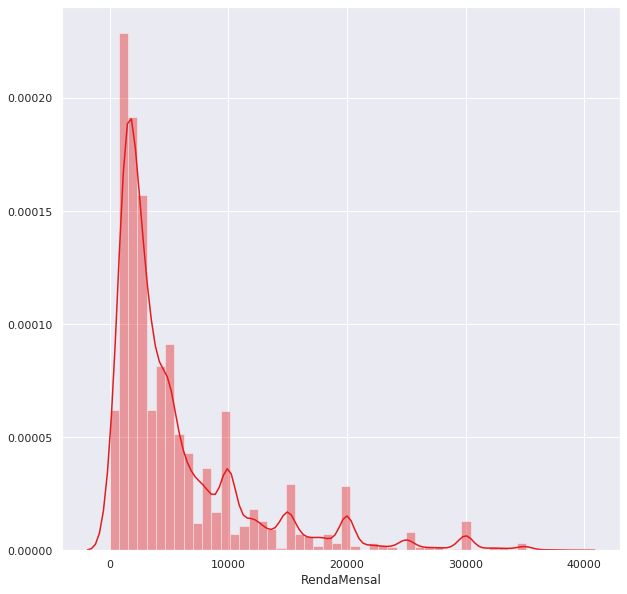

In [343]:
plt.figure(figsize=(10,10))
sns.distplot(df_client[df_client['RendaMensal'] < 40000.00]['RendaMensal'])

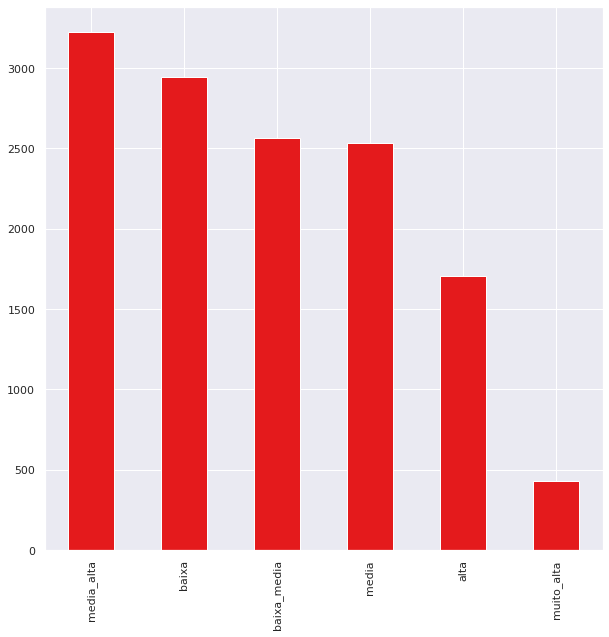

In [344]:
plt.figure(figsize=(10,10))
df_client['b_renda_mensal'].value_counts().plot(kind='bar')

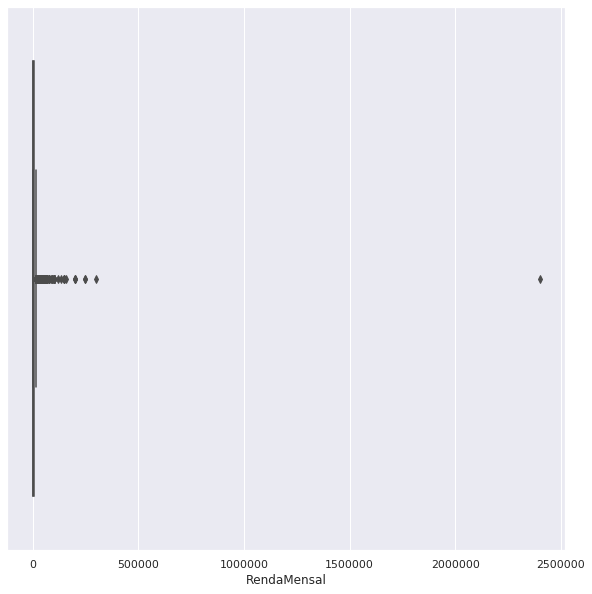

In [345]:
plt.figure(figsize=(10,10))
sns.boxplot(df_client['RendaMensal'])

## Exploração Bivariada

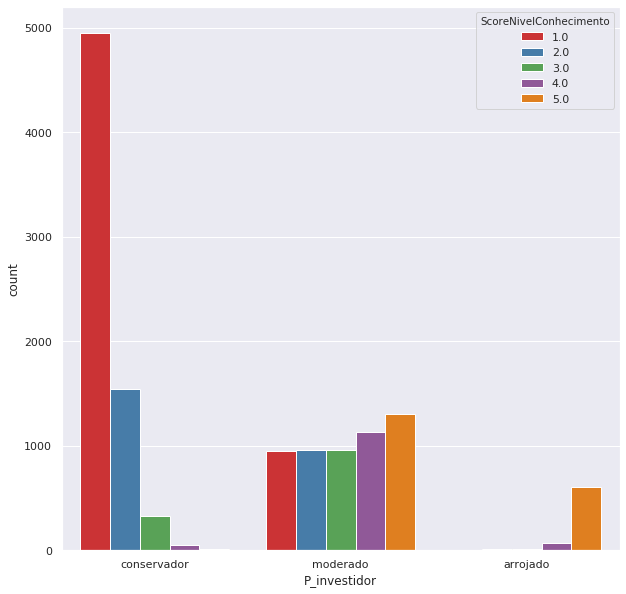

In [346]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="ScoreNivelConhecimento", data=df_client)

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="ScoreNivelConhecimento", data=df_client)

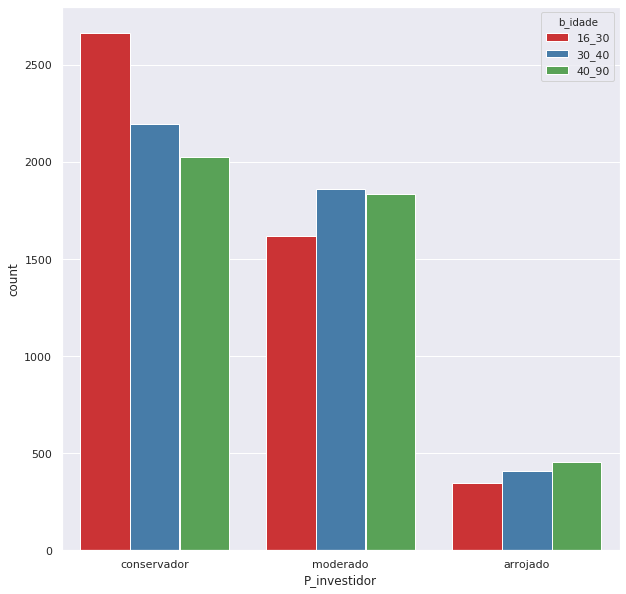

In [355]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="b_idade", data=df_client)

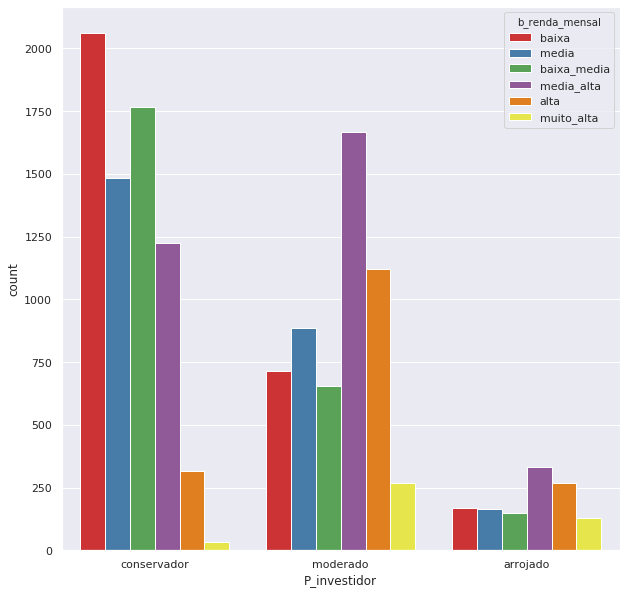

In [348]:
plt.figure(figsize=(10,10))
sns.countplot(x='P_investidor', hue="b_renda_mensal", data=df_client)

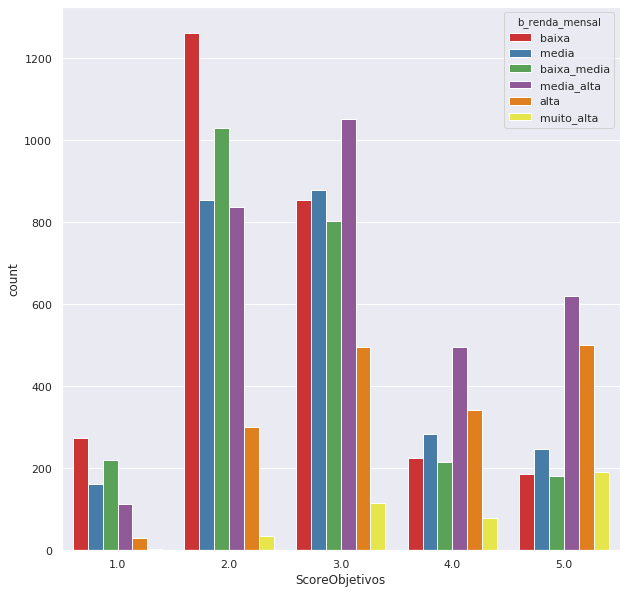

In [350]:
plt.figure(figsize=(10,10))
sns.countplot(x='ScoreObjetivos', hue="b_renda_mensal", data=df_client)

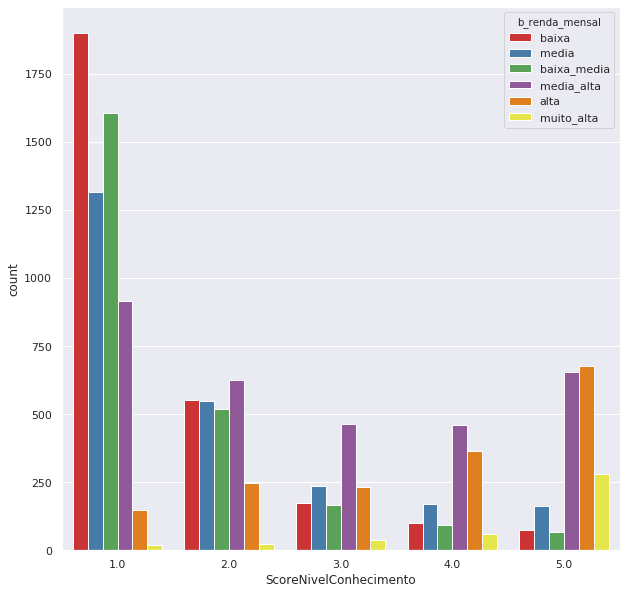

In [351]:
plt.figure(figsize=(10,10))
sns.countplot(x='ScoreNivelConhecimento', hue="b_renda_mensal", data=df_client)

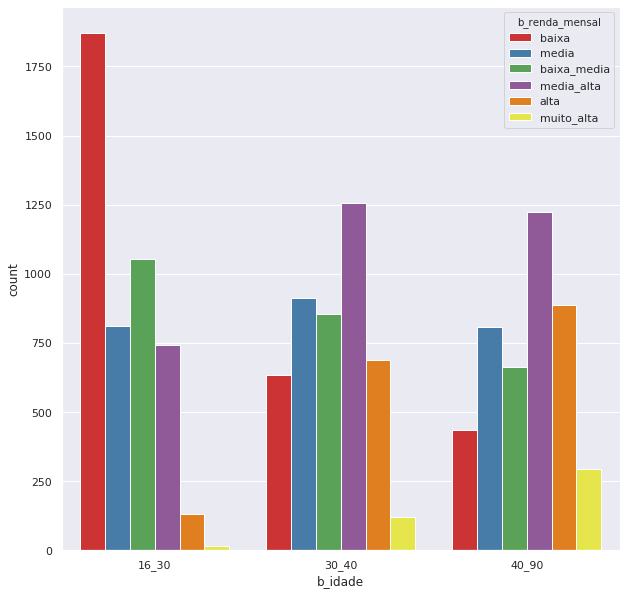

In [352]:
plt.figure(figsize=(10,10))
sns.countplot(x='b_idade', hue="b_renda_mensal", data=df_client)

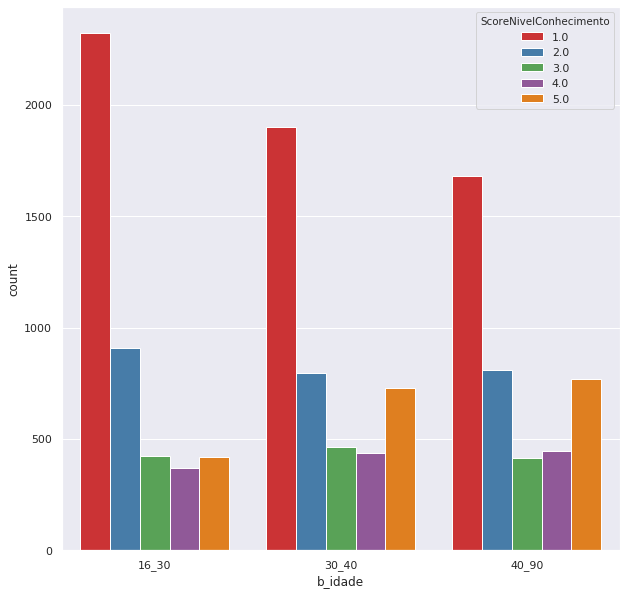

In [353]:
plt.figure(figsize=(10,10))
sns.countplot(x='b_idade', hue="ScoreNivelConhecimento", data=df_client)

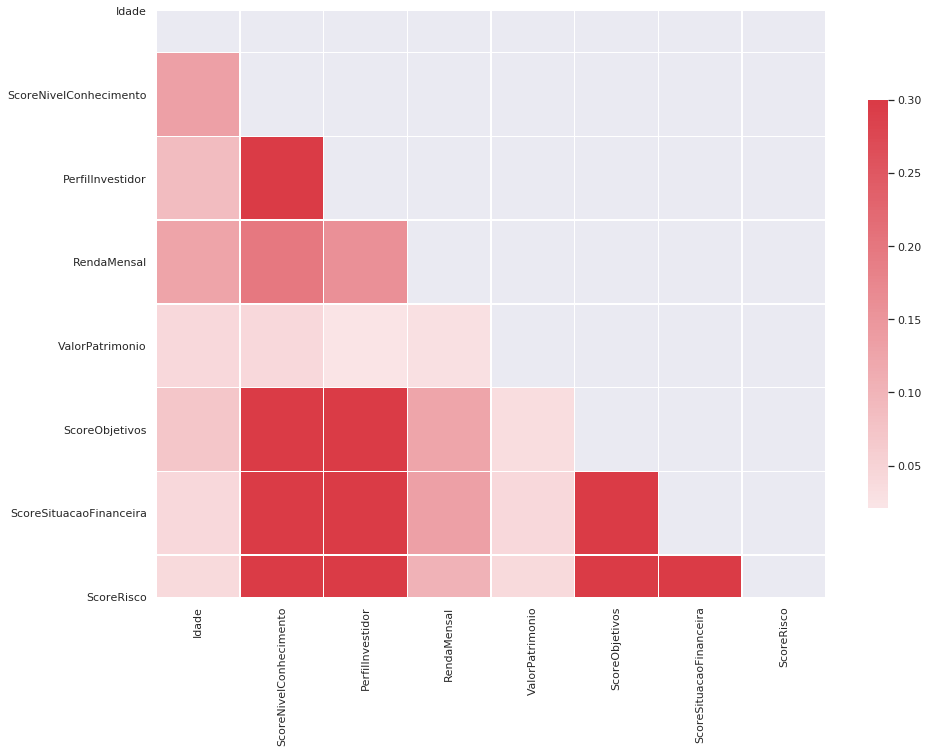

In [354]:
plt.figure(figsize=(15,15))
corr = df_client.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [364]:
df_client.to_csv('data/processados/clientes.csv', index= False)

# ------------------------------------------------------

# Data wrangling de Respostas

# ------------------------------------------------------

In [24]:
df_respostas= df_01[respostas_cols]
df_respostas.drop_duplicates(inplace=True, subset=['Id'])

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
print(f"Clientes únicos: {df_respostas.shape[0]}\n\n")
print(f"Por quanto tempo você pretende manter seu dinheiro investido?:\n{df_respostas['Resposta11'].value_counts()}\n\n")
print(f"Dos seus investimentos, qual a necessidade de resgate diário?:\n{df_respostas['Resposta31'].value_counts()}\n\n")
print(f"Quanto da sua renda mensal você consegue guardar para investir?:\n{df_respostas['Resposta81'].value_counts()}\n\n")

Clientes únicos: 13409


Por quanto tempo você pretende manter seu dinheiro investido?:
Não tenho tempo definido, mas busco possibilidade de resgate diário    3975
De 1 a 5 anos                                                          3781
Até 1 ano                                                              2943
Acima de 5 anos                                                        2198
Name: Resposta11, dtype: int64


Dos seus investimentos, qual a necessidade de resgate diário?:
Não preciso    5841
Até 30%        3387
Até 50%        2243
100%           1426
Name: Resposta31, dtype: int64


Quanto da sua renda mensal você consegue guardar para investir?:
Menor ou igual a 10% da minha renda    5906
Menor ou igual a 20% da minha renda    3329
Menor ou igual a 30% da minha renda    2093
Menor ou igual a 50% da minha renda     941
Mais de  50% da minha renda             628
Name: Resposta81, dtype: int64


